In [1]:
from __future__ import print_function
from numpy import *
# 导入科学计算包numpy和运算符模块operator
import operator
from os import listdir
from collections import Counter

In [5]:
def createDataSet():
    """
    创建数据集和标签
     调用方式
     import kNN
     group, labels = kNN.createDataSet()
    """
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels


def classify0(inX, dataSet, labels, k):
    """
    inx[1,2,3]
    DS=[[1,2,3],[1,2,0]]
    inX: 用于分类的输入向量
    dataSet: 输入的训练样本集
    labels: 标签向量
    k: 选择最近邻居的数目
    注意：labels元素数目和dataSet行数相同；程序使用欧式距离公式.
    预测数据所在分类可在输入下列命令
    kNN.classify0([0,0], group, labels, 3)
    """

    # -----------实现 classify0() 方法的第一种方式----------------------------------------------------------------------------------------------------------------------------
    # 1. 距离计算
    dataSetSize = dataSet.shape[0]
    # tile生成和训练样本对应的矩阵，并与训练样本求差
    """
    tile: 列-3表示复制的行数， 行-1／2表示对inx的重复的次数
    In [8]: tile(inx, (3, 1))
    Out[8]:
    array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
    In [9]: tile(inx, (3, 2))
    Out[9]:
    array([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])
    """
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    """
    欧氏距离： 点到点之间的距离
       第一行： 同一个点 到 dataSet的第一个点的距离。
       第二行： 同一个点 到 dataSet的第二个点的距离。
       ...
       第N行： 同一个点 到 dataSet的第N个点的距离。
    [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    """
    # 取平方
    sqDiffMat = diffMat ** 2
    # 将矩阵的每一行相加
    sqDistances = sqDiffMat.sum(axis=1)
    # 开方
    distances = sqDistances ** 0.5
    # 根据距离排序从小到大的排序，返回对应的索引位置
    # argsort() 是将x中的元素从小到大排列，提取其对应的index（索引），然后输出到y。
    # 例如：y=array([3,0,2,1,4,5]) 则，x[3]=-1最小，所以y[0]=3;x[5]=9最大，所以y[5]=5。
    # print 'distances=', distances
    sortedDistIndicies = distances.argsort()
    # print 'distances.argsort()=', sortedDistIndicies

    # 2. 选择距离最小的k个点
    classCount = {}
    for i in range(k):
        # 找到该样本的类型
        voteIlabel = labels[sortedDistIndicies[i]]
        # 在字典中将该类型加一
        # 字典的get方法
        # 如：list.get(k,d) 其中 get相当于一条if...else...语句,参数k在字典中，字典将返回list[k];如果参数k不在字典中则返回参数d,如果K在字典中则返回k对应的value值
        # l = {5:2,3:4}
        # print l.get(3,0)返回的值是4；
        # Print l.get（1,0）返回值是0；
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # 3. 排序并返回出现最多的那个类型
    # 字典的 items() 方法，以列表返回可遍历的(键，值)元组数组。
    # 例如：dict = {'Name': 'Zara', 'Age': 7}   print "Value : %s" %  dict.items()   Value : [('Age', 7), ('Name', 'Zara')]
    # sorted 中的第2个参数 key=operator.itemgetter(1) 这个参数的意思是先比较第几个元素
    # 例如：a=[('b',2),('a',1),('c',0)]  b=sorted(a,key=operator.itemgetter(1)) >>>b=[('c',0),('a',1),('b',2)] 可以看到排序是按照后边的0,1,2进行排序的，而不是a,b,c
    # b=sorted(a,key=operator.itemgetter(0)) >>>b=[('a',1),('b',2),('c',0)] 这次比较的是前边的a,b,c而不是0,1,2
    # b=sorted(a,key=opertator.itemgetter(1,0)) >>>b=[('c',0),('a',1),('b',2)] 这个是先比较第2个元素，然后对第一个元素进行排序，形成多级排序。
    # sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # return sortedClassCount[0][0]
    # 3.利用max函数直接返回字典中value最大的key
    maxClassCount = max(classCount, key=classCount.get)
    return maxClassCount
    
    # ------------------------------------------------------------------------------------------------------------------------------------------
    # 实现 classify0() 方法的第二种方式

    # """
    # 1. 计算距离
    
    # 欧氏距离： 点到点之间的距离
    #    第一行： 同一个点 到 dataSet的第一个点的距离。
    #    第二行： 同一个点 到 dataSet的第二个点的距离。
    #    ...
    #    第N行： 同一个点 到 dataSet的第N个点的距离。

    # [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    # (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    
    # inx - dataset 使用了numpy broadcasting，见 https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    # np.sum() 函数的使用见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html
    # """
	#   dist = np.sum((inx - dataset)**2, axis=1)**0.5
    
    # """
    # 2. k个最近的标签
    
    # 对距离排序使用numpy中的argsort函数， 见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sort.html#numpy.sort
    # 函数返回的是索引，因此取前k个索引使用[0 : k]
    # 将这k个标签存在列表k_labels中
    # """
    # k_labels = [labels[index] for index in dist.argsort()[0 : k]]
	# """
    # 3. 出现次数最多的标签即为最终类别
    
    # 使用collections.Counter可以统计各个标签的出现次数，most_common返回出现次数最多的标签tuple，例如[('lable1', 2)]，因此[0][0]可以取出标签值
	# """
    # label = Counter(k_labels).most_common(1)[0][0]
    # return label

    # ------------------------------------------------------------------------------------------------------------------------------------------


def test1():
    """
    第一个例子演示
    """
    group, labels = createDataSet()
    print(str(group))
    print(str(labels))
    print(classify0([0.1, 0.1], group, labels, 3))


# ----------------------------------------------------------------------------------------
def file2matrix(filename):
    """
    导入训练数据
    :param filename: 数据文件路径
    :return: 数据矩阵returnMat和对应的类别classLabelVector
    """
    fr = open(filename)
    # 获得文件中的数据行的行数
    numberOfLines = len(fr.readlines())
    # 生成对应的空矩阵
    # 例如：zeros(2，3)就是生成一个 2*3的矩阵，各个位置上全是 0 
    returnMat = zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        # str.strip([chars]) --返回移除字符串头尾指定的字符生成的新字符串
        line = line.strip()
        # 以 '\t' 切割字符串
        listFromLine = line.split('\t')
        # 每列的属性数据
        returnMat[index, :] = listFromLine[0:3]
        # 每列的类别数据，就是 label 标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 返回数据矩阵returnMat和对应的类别classLabelVector
    return returnMat, classLabelVector


def autoNorm(dataSet):
    """
    归一化特征值，消除属性之间量级不同导致的影响
    :param dataSet: 数据集
    :return: 归一化后的数据集normDataSet,ranges和minVals即最小值与范围，并没有用到
    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    # -------第一种实现方式---start-------------------------
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    # 生成与最小值之差组成的矩阵
    normDataSet = dataSet - tile(minVals, (m, 1))
    # 将最小值之差除以范围组成矩阵
    normDataSet = normDataSet / tile(ranges, (m, 1))  # element wise divide
    # -------第一种实现方式---end---------------------------------------------
    
    # # -------第二种实现方式---start---------------------------------------
    # norm_dataset = (dataset - minvalue) / ranges
    # # -------第二种实现方式---end---------------------------------------------
    return normDataSet, ranges, minVals


def datingClassTest():
    """
    对约会网站的测试方法
    :return: 错误数
    """
    # 设置测试数据的的一个比例（训练数据集比例=1-hoRatio）
    hoRatio = 0.1  # 测试范围,一部分测试一部分作为样本
    # 从文件中加载数据
    datingDataMat, datingLabels = file2matrix('/Users/yingzhong/Documents/博士/others/ml/2.KNN')  # load data setfrom file
    # 归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # m 表示数据的行数，即矩阵的第一维
    m = normMat.shape[0]
    # 设置测试的样本数量， numTestVecs:m表示训练样本的数量
    numTestVecs = int(m * hoRatio)
    print('numTestVecs=', numTestVecs)
    errorCount = 0.0
    for i in range(numTestVecs):
        # 对数据测试
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print(errorCount)


def img2vector(filename):
    """
    将图像数据转换为向量
    :param filename: 图片文件 因为我们的输入数据的图片格式是 32 * 32的
    :return: 一维矩阵
    该函数将图像转换为向量：该函数创建 1 * 1024 的NumPy数组，然后打开给定的文件，
    循环读出文件的前32行，并将每行的头32个字符值存储在NumPy数组中，最后返回数组。
    """
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect


def handwritingClassTest():
    # 1. 导入数据
    hwLabels = []
    trainingFileList = listdir('/Users/yingzhong/Documents/博士/others/ml/2.KNN/trainingDigits')  # load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    # hwLabels存储0～9对应的index位置， trainingMat存放的每个位置对应的图片向量
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        # 将 32*32的矩阵->1*1024的矩阵
        trainingMat[i, :] = img2vector('/Users/yingzhong/Documents/博士/others/ml/2.KNN/trainingDigits/%s' % fileNameStr)

    # 2. 导入测试数据
    testFileList = listdir('/Users/yingzhong/Documents/博士/others/ml/2.KNN/testDigits')  # iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('/Users/yingzhong/Documents/博士/others/ml/2.KNN/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount / float(mTest)))


if __name__ == '__main__':
    # test1()
    # datingClassTest()
    handwritingClassTest()

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answe

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answe

the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answe

the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 7, the real answe

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answe

the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answe

the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 5, the real answe

Automatically created module for IPython interactive environment


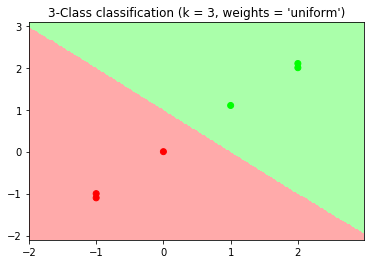

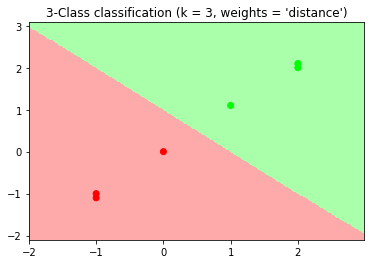

In [7]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

# 导入一些要玩的数据
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # 我们只采用前两个feature. 我们可以使用二维数据集避免这个丑陋的切片
# y = iris.target

# print 'X=', type(X), X
# print 'y=', type(y), y

X = array([[-1.0, -1.1], [-1.0, -1.0], [0, 0], [1.0, 1.1], [2.0, 2.0], [2.0, 2.1]])
y = array([0, 0, 0, 1, 1, 1])

# print 'X=', type(X), X
# print 'y=', type(y), y

h = .02  # 网格中的步长

# 创建彩色的地图
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    # 我们创建了一个knn分类器的实例，并适合数据。
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 绘制决策边界。为此，我们将为每个分配一个颜色
    # 来绘制网格中的点 [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将结果放入一个彩色图中
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 绘制训练点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()